<a href="https://colab.research.google.com/github/adrianatrevinoe/ArtificialInteligenceWorks/blob/main/ai_data_analysis_and_linear_regression_using_python_team_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad de Monterrey
##### Department of Mechanical and Electronic Engineering

Course: Artificial intelligence   
Lecturer: Andrés Hernández Gutiérrez   
Last updated on Friday 28 January 2022.   

---

After completing this lab, you will gain knowledge on:

  1. [Reading data from Google Drive](#section-01). 
  2. [Using ```Pandas``` to read a csv file](#section-02).
  3. [Carrying out a basic single variable exploratory data analysis using the ```weight-height.csv``` dataset](#section-03).
  4. [Performing a normality test using ```pingouin```](#section-04).
  5. [Completing a basic multivariate exploratory data analysis using the aforementioned dataset](#section-05).
  6. [Linear regression using ```sklearn```](#section-06).
  7. [Predictive modelling using linear regression](#section-07).
  8. [Link Text](#section-08)
  

<a name="section-01"></a>
### 1. Let us first mount our Google Drive by importing ```drive``` from ```google.colab```.

In [2]:
# Mount Google Drive in Collab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<a name="section-02"></a>
### 2. The cell below imports the standard libraries we will use throughout this notebook.

+ ```numpy```: this is used for scientific computation. For further details on this library, visit [this link](https://numpy.org/).
+ ```matplotlib```: this allows us to visualise plots.
+ ```pandas```: effective library for reading data from file.

In [3]:
# Imports standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Add the documentation corresponding to the cell below. Include information regarding the method ```read_csv()``` and the parameters ```filepath_or_buffer```, ```sep``` and ```skiprows```.

+ ```pd.read_csv()```: _Read_csv se usa con la libreria de pandas, y sirve para poder leer los datos dentro de un archivo tipo .csv. Lee valores separados por comas_
+ ```filepath_or_buffer```: _Es la direccion de donde se desea sacar la información, va y la busca en el path que le indicas._
+ ```skiprows```: _Se agregan las líneas que no se desean leer, se saltan al principio del archivo._

In [4]:
# Load data from file
weight_height_dataframe = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/datasets/weight-height.csv", sep=',', skiprows=0)

<a name="section-03"></a>
### 3. Exploratory data analysis and data visualisation (one variable)
After running the cell below, explain what the method ```head()``` does.

+ ```head()```: _Se utiliza para agregar las primeras n líneas del archivo, por ejemplo si se pone head(3) se veran las lineas o filas del 0 al 2 (0 1 2 = 3 lineas)._

In [5]:
# Print the content of the first 5 lines in 'weight_height_dataframe'
weight_height_dataframe.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Run the cell below and provide information upon the attributes of the dataframe-type variable ```weight_height_dataframe```: ```columns``` and ```shape```. Moreover, explain the f-string format used for printing information.

+ ```columns```: _Te dice el nombre de las columnas del archivo que tienes, (da las etiquetas)_
+ ```shape```: _Indica cuantas columnas y filas se tiene en un arreglo, te da el tamaño del archivo por ejemplo aqui tiene 1000 filas y 3 columnas (1000,3)_
+ ```f-string```: _Imprime palabras, letras, números etc. en forma de un string, tiene {} para reemplazar valores. Lo que imprime va dentro de ""._

In [6]:
# Print some statistics regarding the dataset
print(f"Headers names: {[colname for colname in weight_height_dataframe.columns]}")
print(f"Number of rows and columns within the dataset: {weight_height_dataframe.shape}")
print(f"Number of samples: {weight_height_dataframe.shape[0]}")
print(f"Number of columns: {weight_height_dataframe.shape[1]}")

Headers names: ['Gender', 'Height', 'Weight']
Number of rows and columns within the dataset: (10000, 3)
Number of samples: 10000
Number of columns: 3


Based on the output generated by the cell below, provide an explanation of what this cell does:

_males_df filtra y guarda todos los valores del archivo de los hombres para después poder imprimir este arreglo._

In [7]:
# Filter data belonging to males
males_df = weight_height_dataframe[weight_height_dataframe["Gender"] == 'Male']
print(f"Content of males dataframe:\n {males_df}")

Content of males dataframe:
      Gender     Height      Weight
0      Male  73.847017  241.893563
1      Male  68.781904  162.310473
2      Male  74.110105  212.740856
3      Male  71.730978  220.042470
4      Male  69.881796  206.349801
...     ...        ...         ...
4995   Male  68.860062  177.131052
4996   Male  68.973423  159.285228
4997   Male  67.013795  199.195400
4998   Male  71.557718  185.905909
4999   Male  70.351880  198.903012

[5000 rows x 3 columns]


Run the cell below, understand what each line performs and provide details on:
+ ```plt.figure()```: _Crea una nueva figura_
+ ```plt.hist()```: _Genera un histograma en la gráfica_
+ ```figsize=```: _Especifica el tamaño en pulgadas de la figura, en este caso es de 14 pulgadas por 6_
+ ```bins=```: _Son las barras del histograma, poniendo bins como "int" hace que sean del mismo ancho y tamaño._
+ ```plt.xlabel```: _Nombra el eje x en la gráfica_
+ ```plt.ylabel```: _Nombra el eje y en la grafica_
+ ```plt.title```: _Incluye el nombre de la gráfica_
+ ```plt.grid```: _Te da la opcion de poner las lineas de grid en la gráfica  si se pone (true) la pone, si se pone (false) no se incluye._

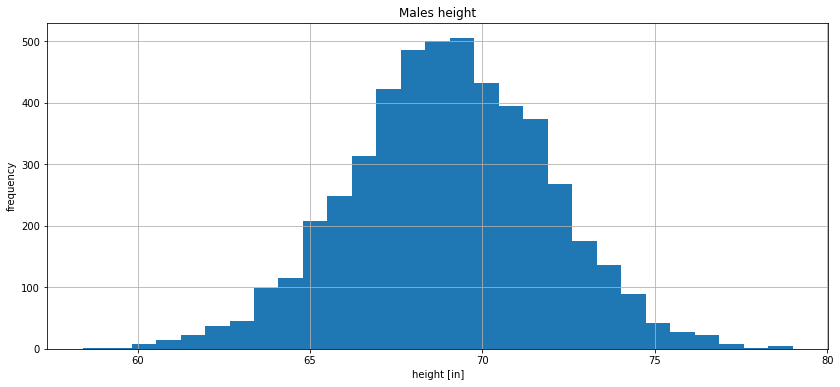

In [8]:
# Plot the histogram of males heights 
plt.figure(figsize=(14,6))
plt.hist(males_df["Height"], bins=int(1 + 3.322 * np.log(len(males_df["Height"]))))
plt.xlabel("height [in]")
plt.ylabel("frequency")
plt.title("Males height")
plt.grid(True)

Run the cell below, understand what each line does and provide details upon: 
+ ```plt.subplot()```: _Grafica diferentes gráficas (segun la cantidad dada) en una misma figura_
+ ```ax1.set_title```: _Agrega un titulo a la figura 1_
+ ```ax1.set_xlabel```: _Agrega un titulo al eje x de la figura 1_
+ ```ax1.set_ylabel```: _Agrega un titulo al eje y de la figura 1_

<Figure size 1008x432 with 0 Axes>

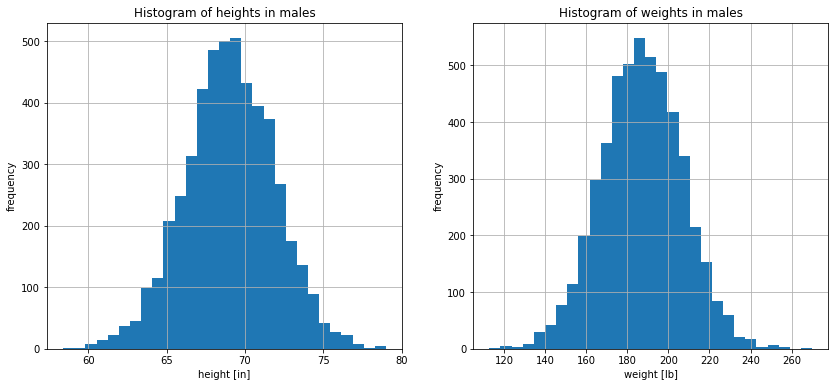

In [9]:
# Plot the histogram of males heights and weights
plt.figure(figsize=(14,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.hist(males_df["Height"], bins=int(1 + 3.322 * np.log(len(males_df["Height"]))))
ax1.set_title("Histogram of heights in males")
ax1.set_xlabel("height [in]")
ax1.set_ylabel("frequency")
ax1.grid(True)
ax2.hist(males_df["Weight"], bins=int(1 + 3.322 * np.log(len(males_df["Weight"]))))
ax2.set_title("Histogram of weights in males")
ax2.set_xlabel("weight [lb]")
ax2.set_ylabel("frequency")
ax2.grid(True);

<a name="section-04"></a>
### 4. Normality test 

Run the code below and give details on:

+ ```scipy```: _Es una libreria de herramientas y algorítmos matemáticos, puede crear datos cientificos y usarse para computación técnica_
+ ```stats```: _Permite agregar información de estadistica, puede crear información probabilistica como distribuciones de probabilidades, un resumen de la estadisticas y estadisticas de frecuencia también. En este ejemplo da las estadisticas de la altura._
+ ```stats.probplot()```: _Crea una figura (gráfica) de las estadisticas de la de la altrua de los hombres._

_Include here a brief description (one paragraph) of what a Q-Q plot represents; use the information visualised on the graph in your explanation._

Un gráfico Q-Q plot representa una muestra y comprueba si las muestras provienen de una misma distribución. En este caso se comprobo una distribución normal ya que se agrega el "dist = norm" y si es ya que todos los datos estan muy cercanos a la linea roja, esto quiere decir que los datos si tienen esta distribución gauseana.

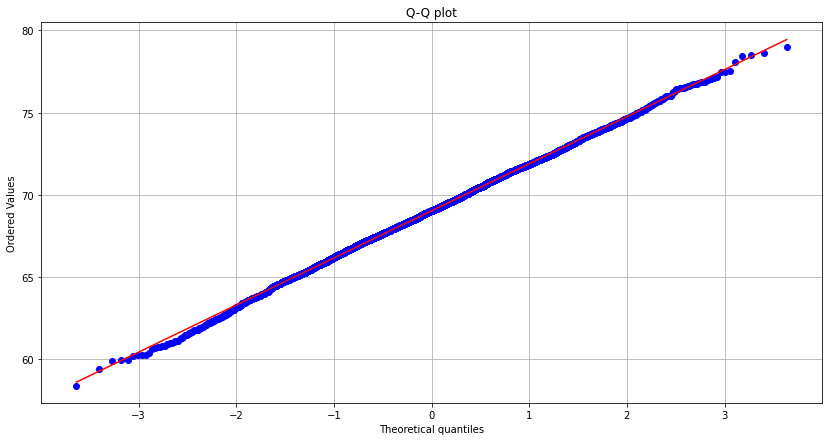

In [10]:
from scipy import stats
plt.figure(figsize=(14,7))
stats.probplot(males_df["Height"], dist='norm', plot=plt)
plt.title("Q-Q plot")
plt.grid(True)

Run the code and give details on:


+ ```pingouin```: _Es una libreria de estadistica._
+ ```pg.normality```: _Funcion que genera una prueba de normalidad univariable (campana de Gauss)_
+ ```alpha=```: _Es el valor de la distribución gauseana, puede tener diferentes valores, da el nivel de significancia, en estadistica se usa para rechazar una hipotesis nula que es verdadera._

After understanding the corresponding output, give details on:
+ ```W```: _Valor estatico que proviene de la prueba de Shapiro-Wilk, la cual prueba que una muestra aleatoria provenga de una distribucion normal_
+ ```pval```: _El valor es mayor a alfa, esto quiere decir que no se concluye que hay una diferencia de significancia._
+ ```normal```: _Es True ya que se distribuye de manera normal_ 

In [17]:
#!pip install pingouin
import numpy as np
import pingouin as pg 
dd = np.array([males_df['Height']]).transpose()
pg.normality(males_df['Height'].to_numpy().transpose(), alpha=0.05)

,W,pval,normal
0,0.999443,0.140593,True


Run the code below and explain the graph.  
_La gráfica es la misma que arriba pero para los pesos, esta gráfica nos dice que los pesos también siguen una distribución normal ya que casi todos los datos se acercan a la línea roja, solo algunos puntos no como el que se ve en la esquina superior derecha._


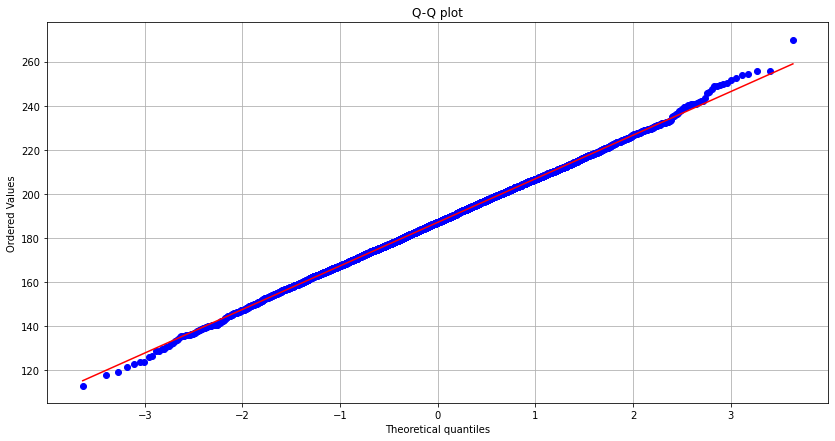

In [18]:
plt.figure(figsize=(14,7))
stats.probplot(males_df["Weight"], dist='norm', plot=plt)
plt.title("Q-Q plot")
#plt.axis('equal')
plt.grid(True)

As you can see in the cell below, the ```Height``` variable is transformed using the cosine and sine trigonometric functions. This transformation makes each variable change its distribution, see the figure below; therefore, its values no longer follow a normal distribution.   

Based on the knowledge gained above, explain the information included in the figures below:

+ Histogram plot: _No sigue la regla empirica de la distrubucion Gaussiana [68-95-99.7], por lo cual no es una distribucion normal_
+ Q-Q plot: _Se ve que ya no hay una distribución normal ya que no hay correlación, los datos de la altura ya no se acercan a la línea roja, tiene otra distribución_

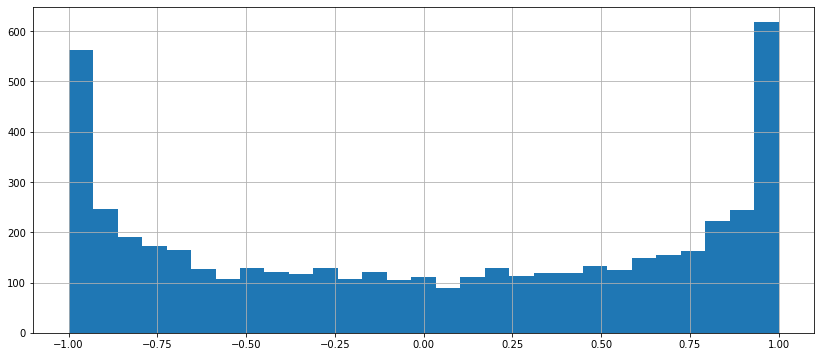

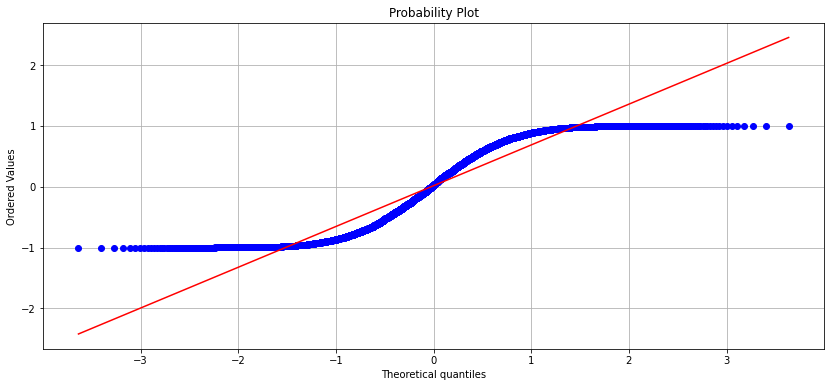

In [19]:
height_transformed = np.cos(males_df['Height'])

plt.figure(figsize=(14,6))
plt.hist(height_transformed, bins=int(1 + 3.322 * np.log(len(height_transformed))))
plt.grid(True)
plt.figure(figsize=(14,6))
stats.probplot(height_transformed, dist='norm', plot=plt);
plt.grid(True)

Run the cell below an explain the output parameters:

+ **W**: _Valor estatico que proviene de la prueba de Shapiro-Wilk, la cual prueba que una muestra aleatoria provenga de una distribucion normal_
+ **pval**: _El valor es menor que alfa, por tanto, no tiene una distribucion normal_
+ **normal**: _Es False ya que no tiene una distribucion normal_

In [20]:
pg.normality(height_transformed, alpha=0.05)

,W,pval,normal
Height,0.900269,0.0,False


<a name="section-05"></a>
### 5. Multivariate exploratory data analysis and data visualisation 


In this section, you will gain knowledge on basic multivariate data analysis. The figure below shows a plot of how both the ```height``` and ```weight``` variables relate to each other. 

Given this plot, respond to the following questions:

+ Is there a relationship between ```height``` and ```weight```?   
Si, si hay relacion ya que se puede observar que la altura por ejemplo incrementa mientras que el peso incrementa, y es lo mismo al reves.
+ If so, can this relationship be linear?   
Si puede ser linear ya que el aumento se ve proporcional.
+ Does this data follow a direct or inverse relatioship?   
Estos datos siguen una relación directa ya que x cambia mediante y cambia, x incrementa mientras y incrementa o x decrementa mientras y decrementa.

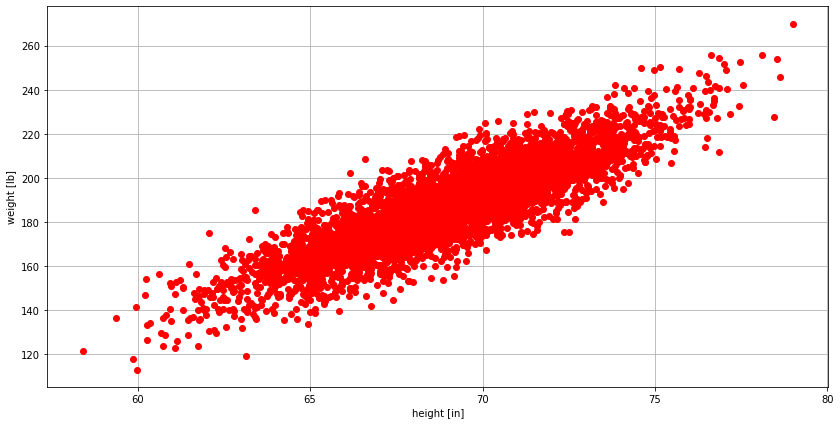

In [21]:
plt.figure(figsize=(14,7))
plt.plot(males_df["Height"], males_df["Weight"], 'or')
plt.xlabel("height [in]")
plt.ylabel("weight [lb]")
plt.grid(True)

As you can see from the cell below, it is possible to compute the covariance matrix of the data visualised above using the ```np.cov()``` method. Based on the covariance matrix obtained here, indicate whether this is a spherical, diagonal or full covariance - include a sentence that supports your explanation.

<br/>

_Es de covarianza completa debido a que la diagonal opuesta a una matriz identidad tiene covarianzas iguales, mientras que las varianzas (matriz diagonal) son diferentes entre si_

<br/>

Finding the Eigenvectors and Eigenvalues of a covariance matrix provides a dispersion metric around the mean value. You do not need to explain the information depicted in this graph - your lecturer will do so.


Covariance:
[[  8.19884325  48.87964899]
 [ 48.87964899 391.29407402]]

Mean:
[ 69.02634591 187.02062066]

Eigenvales:
 [  2.06057385 397.43234342]

Eigenvectors:
 [[-0.99220698 -0.1246006 ]
 [ 0.1246006  -0.99220698]]


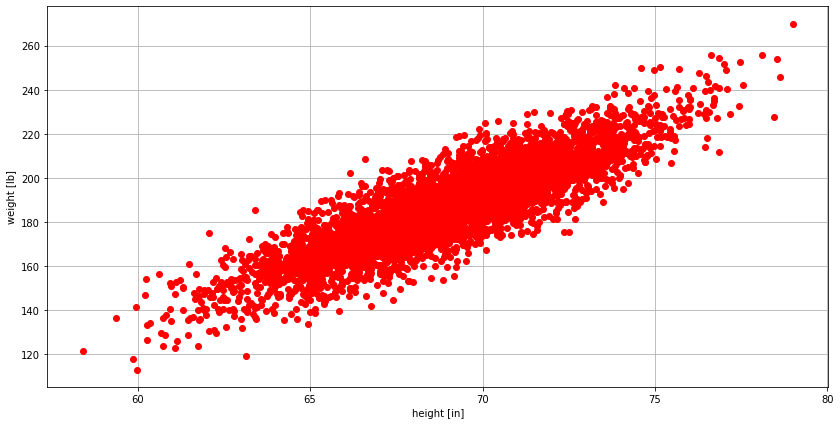

In [22]:
from numpy import linalg as la

males_height_weight_data = np.array([males_df["Height"], males_df["Weight"]])
males_height_weight_covariance = np.cov(males_height_weight_data)
males_height_weight_mean = np.mean(males_height_weight_data, axis=1)

print(f"\nCovariance:\n{males_height_weight_covariance}")
print(f"\nMean:\n{males_height_weight_mean}")

w, v = la.eig(males_height_weight_covariance)

print(f"\nEigenvales:\n {w}")
print(f"\nEigenvectors:\n {v}")

plt.figure(figsize=(14,7))
plt.plot(males_height_weight_data[0,:], males_height_weight_data[1, :], 'or')
plt.xlabel("height [in]")
plt.ylabel("weight [lb]")
plt.grid(True)

If we were interested in carrying out a probability density estimation analysis, the library ```scipy``` offers the ```stats``` module to make use of the ```gaussian_kde````function (kernel density estimation). Read through the cell below and try to understand what each line does. Your lecturer will give you further details on these lines. 

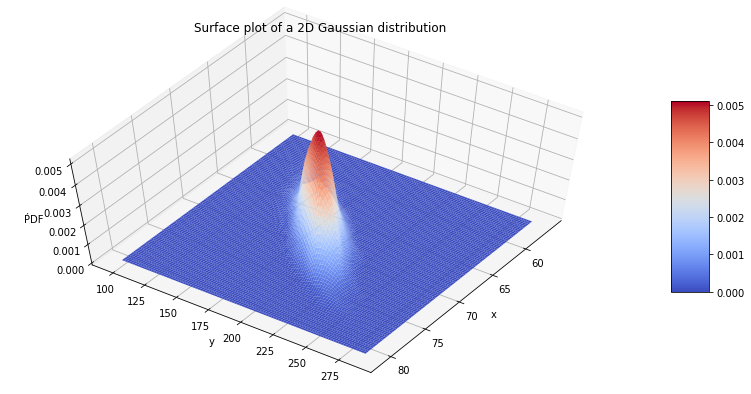

In [23]:
# Source: https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn.datasets import make_blobs

x = males_height_weight_data[0,:]
y = males_height_weight_data[1,:]

deltaX = (np.max(x)-np.min(x))/10
deltaY = (np.max(y)-np.min(y))/10

xmin = np.min(x)-deltaX
xmax = np.max(x)+deltaX
ymin = np.min(y)-deltaY
ymax = np.max(y)+deltaY
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x,y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('ṔDF')
ax.set_title("Surface plot of a 2D Gaussian distribution")
fig.colorbar(surf, shrink=0.5, aspect=5) 
ax.view_init(60, 35)

Similar to the univariate normality test analysis, it is also possible to carry out this test using ```pingouin``` on a multivariate dataset. This is done in the cell below. If the data follows a normal distribution for the specified ```alpha```, the ```normal``` attribute equals ```True```; otherwise, it is ```False```. 

In [24]:
pg.multivariate_normality(males_height_weight_data.transpose(), alpha=0.05)

HZResults(hz=1.0267944422475557, pval=0.16616783343977465, normal=True)

<a name="section-06"></a>
### 6. Linear regression using ```sklearn```
The contents below are ungraded cells; these cells are included here to know how we can build a predictive model to estimate the weight in males given their height. Go through these lines and try to understand how to do linear regression using the ```sklearn``` library.

Size of complete dataset: (2, 5000)
Size of training dataset: (4000,)
Size of testing dataset: (1000,)
Regression model slope: [5.96679828]
Regression model intercept: -224.90412978274367


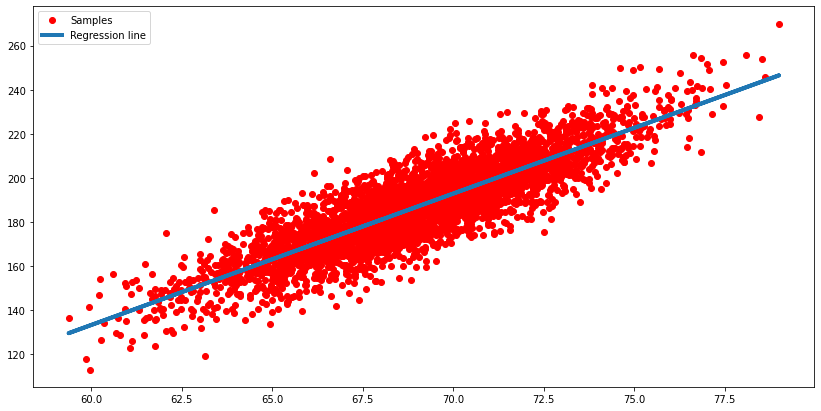

In [25]:
# Linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Split data into the train and test sets
NSAMPLES = males_height_weight_data.shape[1]

x_train, x_test, y_train, y_test = train_test_split(males_height_weight_data[0,:], 
                                                    males_height_weight_data[1,:],
                                                    test_size=0.20,
                                                    random_state=14)

print(f"Size of complete dataset: {males_height_weight_data.shape}")
print(f"Size of training dataset: {x_train.shape}")
print(f"Size of testing dataset: {x_test.shape}")

reg_model = linear_model.LinearRegression().fit(x_train.reshape(-1,1), y_train)
print(f"Regression model slope: {reg_model.coef_}")
print(f"Regression model intercept: {reg_model.intercept_}")


reg_model_line = reg_model.predict(x_train.reshape(-1,1))
plt.figure(figsize=(14,7))
plt.plot(x_train, y_train, 'or')
plt.plot(x_train, reg_model_line, linewidth=4)
plt.legend(["Samples", "Regression line"]);


<a name="section-07"></a>
### 7. Predictive modelling using linear regression.

The utility functions listed below do the following:

+ ```def metres_to_inches()```: converts height from inches to metres.
+ ```def pounds_to_kilograms()```: converts weight from pounds to kilograms.

In [26]:
def metres_to_inches(metres_val):
    return metres_val/0.0254

def pounds_to_kilograms(pounds_val):
    return pounds_val*0.453592


Let us now use this model in production and run the estimate of weight in males given their height in metres.

In [27]:
# Height in metres
height = float(input("Enter your height in metres: "))
height_inches = metres_to_inches(np.array([height]))


print(f"Predicted weight: {pounds_to_kilograms(reg_model.predict(np.array([height_inches]).reshape(1,-1)))[0]:.4f} kg")

Enter your height in metres: 1.65
Predicted weight: 73.8007 kg


---
### Adriana:
Esta actividad me ayudo mucho a entender un poco más de python, algunas cosas se me hicieron fáciles ya que se parece un poco a matlab y tiene funciones muy parecidas, pero también aprendí otras funciones las cuales no sabia que hacia. Google Colab es una herramienta muy útil ya que me deja también hacer cambios al código para entender aún más que puede pasar si modifico algunos numeros o strings o en general variables. Creo que fue una práctica muy completa en la que pude tener más conocimientos sobre este lenguaje en una forma fácil de entender y creo que este tipo de ejercicios me ayudan a que se me quede más la información y no sea algo que se me olvide facil.

### Susana:
En la elaboracion de esta actividad pude aprender sobre librerias nuevas, algunos conceptos nuevos de Python, asi como la interpretacion de analisis estadistico en el analisis de datos. Asi mismo, aprendi la incorporacion de documentos en Drive, y, a usar la pagina de Google Colaboratory, pues generalmente uso un IDE para programar en Python o la linea de comandos de Linux.

### Emilio:
Esta actividad la encontre util para comprender como podemos programar python en Drive e incluso leer archivos de Drive, tambien me ayudo a entender como se importaban las librerias, pues aunque ya habia trabajado anteriormente con Python no habiamos utilizado librerias en el Colab. En cuanto a las librerias me parecio interesante todo los calculos estadistico y graficas que podemos generar a partir de los datos que desemos analizar.







To complete this homework, download this Notebook and rename it as:

```ai-data-analysis-and-linear-regression-using-python-team-01.ipynb``` 

for team 1, **change this accordingly** and upload the following files to Blackboard:

+ ```ai-data-analysis-and-linear-regression-using-python-team-01.ipynb```
+ ```weight-height.csv```.

_Happy learning! - Andrés_